# **Applying KNearest Neighbors classifier model to determine whether the model will be able to predict player positions in EA FC 24 based on their ingame stats**

We start off by importing Pandas library to read and manipulate data and loading our **`male_players.csv`** dataset

In [ ]:
import pandas as pd

data = pd.read_csv('male_players.csv')
data.head()

<ipython-input-194-0894790c9ec1>:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


We have too many unnecessary columns, let's group them together in a list and drop them with Python's **`.drop()`** function

In [ ]:
columns_to_drop = ['overall', 'player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'dob', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'potential', 'value_eur', 'wage_eur', 'age', 'weak_foot', 'skill_moves', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
data = data.drop(columns = columns_to_drop, axis = 1)
data.head()

,player_positions,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,"ST, LW",182,75,97.0,90.0,80.0,92.0,36.0,78.0,78,...,83,64,38,93,83,84,88.0,26,34,32
1,ST,195,94,89.0,93.0,66.0,80.0,45.0,88.0,47,...,86,87,43,96,74,84,87.0,38,47,29
2,"CM, CAM",181,75,72.0,88.0,94.0,87.0,65.0,78.0,95,...,92,75,66,88,95,83,88.0,66,70,53
3,"CF, CAM",169,67,80.0,87.0,90.0,94.0,33.0,64.0,83,...,90,44,40,91,92,75,96.0,20,35,24
4,"CF, ST",185,81,79.0,88.0,83.0,87.0,39.0,78.0,75,...,81,63,39,92,90,85,90.0,43,24,18


Checking for NaN values

In [ ]:
data.isna().sum()

,0
player_positions,0
height_cm,0
weight_kg,0
pace,20024
shooting,20024
passing,20024
dribbling,20024
defending,20024
physic,20024
attacking_crossing,0


Let's drop all rows with NaN values

In [ ]:
data = data.dropna()
data.isna().sum()

,0
player_positions,0
height_cm,0
weight_kg,0
pace,0
shooting,0
passing,0
dribbling,0
defending,0
physic,0
attacking_crossing,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130712 entries, 0 to 147127
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_positions             130712 non-null  object 
 1   height_cm                    130712 non-null  int64  
 2   weight_kg                    130712 non-null  int64  
 3   pace                         130712 non-null  float64
 4   shooting                     130712 non-null  float64
 5   passing                      130712 non-null  float64
 6   dribbling                    130712 non-null  float64
 7   defending                    130712 non-null  float64
 8   physic                       130712 non-null  float64
 9   attacking_crossing           130712 non-null  int64  
 10  attacking_finishing          130712 non-null  int64  
 11  attacking_heading_accuracy   130712 non-null  int64  
 12  attacking_short_passing      130712 non-null  int64  
 13  atta

Some players have multiple positions in **`player_positions`** column, let's split everything within the column and use `,` as separator and keep any values that appear at index number 0 (keeping first value after the split)

In [ ]:
data['player_positions'] = data['player_positions'].str.split(',').str[0]
data['player_positions'][:5]

,player_positions
0,ST
1,ST
2,CM
3,CF
4,CF


Player positions look much cleaner now. Let's check how many unique player positions we've to deal with in order to factorize them later.

In [ ]:
unique_positions = data['player_positions'].unique()
print(unique_positions)

['ST' 'CM' 'CF' 'LW' 'CDM' 'CB' 'RW' 'CAM' 'RB' 'RM' 'LB' 'LM' 'LWB' 'RWB'
 'GK']


Assigning integer values to players' respective positions under **`new_positions`** dictionary. Some positions such as RWB/LWB/RB/LB are all classified under the same integer because their positions are 99% similar.

Then we map our **`player_positions`** column with new values from **`new_positions`** dictionary.

**`data['player_positions'][:5]`** confirms that mapping went well, let's continue.

In [ ]:
new_positions = {
    'GK': 0,
    'RB': 1,
    'RWB': 1,
    'LWB': 1,
    'LB': 1,
    'CB': 2,
    'LM': 3,
    'RM': 3,
    'CM': 3,
    'CDM': 4,
    'CAM': 5,
    'LW': 6,
    'RW': 6,
    'ST': 7,
    'CF': 7,
    }
data['player_positions'] = data['player_positions'].map(new_positions)
data['player_positions'][:5]

,player_positions
0,7
1,7
2,3
3,7
4,7


There's only one goalkeeper in this dataset unfortunately, we will have to axe row with single value of **`player_positions`** that is equal to 0 in order to prevent model inaccuracy

In [ ]:
data['player_positions'].value_counts()

,count
player_positions,
3,33493
2,25363
1,23038
7,21534
4,12004
5,8868
6,6411
0,1


In [ ]:
data = data[data['player_positions'] != '0']
old_data = data

# Training our model
We divide our dataset into X (features) and y (target) with a test size of 20%

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['player_positions'], axis = 1)
y = data['player_positions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

### Before we apply any model, we first have to scale our feature data between both the train and test splits

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

We import libraries for KNN model and for Cross Validation in order to find optimal number of n_neighbors.
We fit the training data with X_train and y_train samples, beforehand we've chosen 8 as our n_neighbors number.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Our KNN model returns 79.2% accuracy when using n_neighbors at 8, which is really solid considering data such as player data is open for interpretation. Let's check if there's a number more optimal than 8 by Cross-validating with **`GridSearchCV`** all the numbers between 1 and 50.

In [ ]:
print(knn.score(X_test, y_test))

0.7915694449757105


Best n_neighbors value is 5 which returns a mere 1% decrease. I will stick with my current model and its **`n_neighbors = 8`**.

In [ ]:
param_grid = {'n_neighbors': np.arange(5, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'n_neighbors': np.int64(5)}
0.7851562524399858


# Plotting a confusion matrix to check which classes are misslabeled in our model

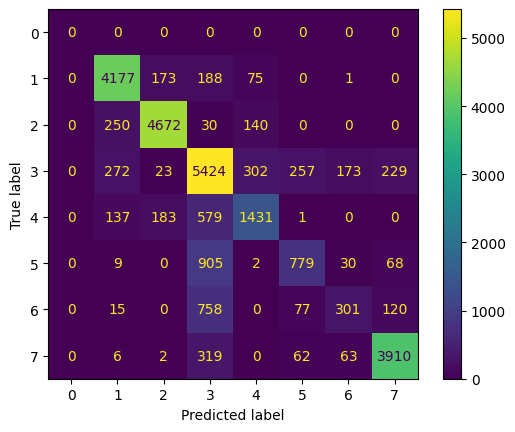

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()

## Making a classification report to check our f1-scores
Looks like our model is extremely correct when it comes to centre-backs, fullbacks and strikers.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88      4614
           2       0.92      0.92      0.92      5092
           3       0.66      0.81      0.73      6680
           4       0.73      0.61      0.67      2331
           5       0.66      0.43      0.52      1793
           6       0.53      0.24      0.33      1271
           7       0.90      0.90      0.90      4362

    accuracy                           0.79     26143
   macro avg       0.75      0.69      0.71     26143
weighted avg       0.79      0.79      0.78     26143



### Let's try it again, this time we're setting LM, RM, CAM, CM and CDM under the same class, wingers together with forwards under the same class to see the performance of our model.

In [ ]:
new_positions2 = {
    1: 1,
    1: 1,
    1: 1,
    1: 1,
    2: 2,
    3: 3,
    3: 3,
    3: 3,
    5: 3,
    4: 3,
    6: 4,
    6: 4,
    7: 4,
    7: 4,
    }

old_data['player_positions'] = data['player_positions']
old_data['player_positions'] = old_data['player_positions'].map(new_positions2)
old_data['player_positions'].head()

,player_positions
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0


There's one row with corrupt `player_positions` column so we're filling that row with class of forward as it should be.

In [ ]:
old_data = old_data.fillna(4.0)

# Training our generalised model

In [ ]:
X_retry = old_data.drop(columns = ['player_positions'], axis = 1)
y_retry = old_data['player_positions']

x_train2, X_test2, y_train2, y_test2 = train_test_split(X_retry, y_retry, test_size = 0.2, random_state = 14)

### Scaling training and testing sets for better performance

In [ ]:
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

## **There we have it. Our model has reached 94.6% confidence of determining which 4 classes a player belongs in EA FC 24 game.**
### **This marks 16.1% increase from our previous model.**

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled2, y_train2)
knn2.score(X_test_scaled2, y_test2)

0.9455686034502544